# Replication with R from Jupyter
### Matt Ingram
### University at Albany, SUNY
# Replication 1: Lacina (2006)
### __Computing Tools__: R and markdown in JupyterHub
### __Subject fields__: political science, international relations, civil war, political violence, conflict studies, peace science
### __Methods topics__: data management, descriptive statistics, histograms, OLS

# Introduction

This notebook documents a replication of Lacina (2006) in R from within the Jypyter platform. 

R can run natively in Jupyter using the IRkernel. That is, in contrast to using Stata, where a notebook opens with Python running natively and Stata must be called within each cell using Stata, users can run a notebook like this oen with R running natively. R does not need to be called within each cell.

For more information on IRkernel, see: https://github.com/IRkernel/IRkernel

I am using JupyterHub and JupyterLab. JupyterHub is a server-based version of Jupyter that allows central installation of software and multiple users. In academic settings, the advantages are:
- shared resources to avoid duplication and enhance collaboration
- secure sign-on with instiutional IDs and passwords
- remote computing
- extensions to use JupyterHub as a learning management system, including assigmment management

JupyterLab is an interface that mimics features of an integrated development environment (IDE), allowing multiple notebooks to be opened at once, side by side, while at the same time being able to view directory, pull-down menus, etc.

For more information on Jupyter, see: http://jupyter.org/

For more information on JupyterHub, see: https://github.com/jupyterhub/jupyterhub

For more information on JupyterLab, see: https://github.com/jupyterlab/jupyterlab

# Set Environment

## Set options

In [1]:
# Change plot size to 4 x 4
options(repr.plot.width=4, repr.plot.height=4)

## Import R packages

In [2]:
library(pacman)
p_load(ggplot2, data.table, xtable, stargazer, repr)

# Set Working Directory

In [3]:
#getwd()
#path <- '/home1/s/m/mi122167/OpenStats/replication1lacina'
#setwd(path)

[1] "/home1/s/m/mi122167/OpenStats/replication1lacina"

## Create sub-directories

In [4]:
# dir.create checks whether subdirectories exist; if missing, creates them
dir.create("./data",showWarnings = TRUE)
dir.create("./figures",showWarnings = TRUE)
dir.create("./output",showWarnings = TRUE)
dir.create("./tables",showWarnings = TRUE)

Warning message in dir.create("./data", showWarnings = TRUE):
“'./data' already exists”Warning message in dir.create("./figures", showWarnings = TRUE):
“'./figures' already exists”Warning message in dir.create("./output", showWarnings = TRUE):
“'./output' already exists”Warning message in dir.create("./tables", showWarnings = TRUE):
“'./tables' already exists”

# Load Data

In [5]:
data <- fread('http://mattingram.net/teaching/workshops/introR/materials/Lacina_JCR_2006_replication.csv')
data[1:5,1:3]

ID,conflict_name,ccode
1990,India (Mizoram),750
1500,Argentina 1955,160
2770,Romania 1989,360
2970,Croatia 1992-5,344
3000,Georgia (South Ossetia),372


# Summary Statistics

In [6]:
data <- subset(data, select = c('battledeadbest', 'lnbdb', 'lnduration', 'lnpop', 'lnmilqual', 'lngdp', 'cw', 
             'lnmountain', 'democ', 'ethnicpolar', 'relpolar'))
summary(data)

 battledeadbest        lnbdb          lnduration         lnpop      
 Min.   :    900   Min.   : 6.802   Min.   :0.0000   Min.   :13.32  
 1st Qu.:   3197   1st Qu.: 8.070   1st Qu.:0.6931   1st Qu.:15.53  
 Median :   9525   Median : 9.160   Median :1.3863   Median :16.64  
 Mean   :  62677   Mean   : 9.362   Mean   :1.5572   Mean   :16.76  
 3rd Qu.:  40475   3rd Qu.:10.608   3rd Qu.:2.4632   3rd Qu.:17.77  
 Max.   :2097705   Max.   :14.556   Max.   :4.0073   Max.   :20.65  
                                                                    
   lnmilqual           lngdp             cw           lnmountain   
 Min.   : 0.9243   Min.   :3.912   Min.   :0.0000   Min.   :0.000  
 1st Qu.: 7.0397   1st Qu.:6.341   1st Qu.:0.0000   1st Qu.:2.116  
 Median : 8.0848   Median :7.075   Median :1.0000   Median :2.632  
 Mean   : 7.9496   Mean   :7.029   Mean   :0.6667   Mean   :2.688  
 3rd Qu.: 8.7413   3rd Qu.:7.755   3rd Qu.:1.0000   3rd Qu.:3.646  
 Max.   :11.1214   Max.   :9.052   Max. 

# Histograms of outcome of interest

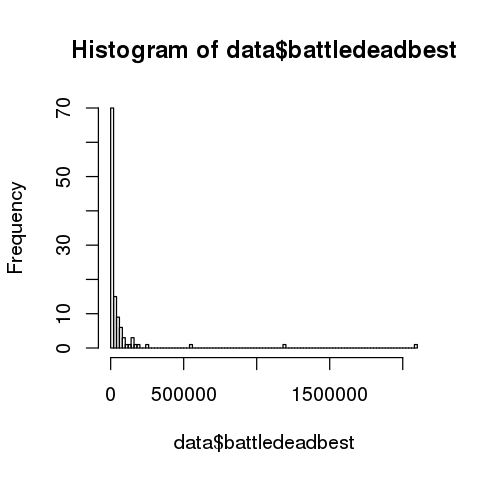

In [7]:
hist(data$battledeadbest, 100)

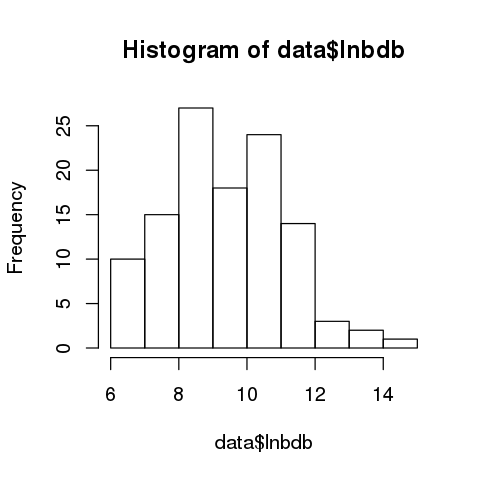

In [8]:
hist(data$lnbdb)

png 
  2

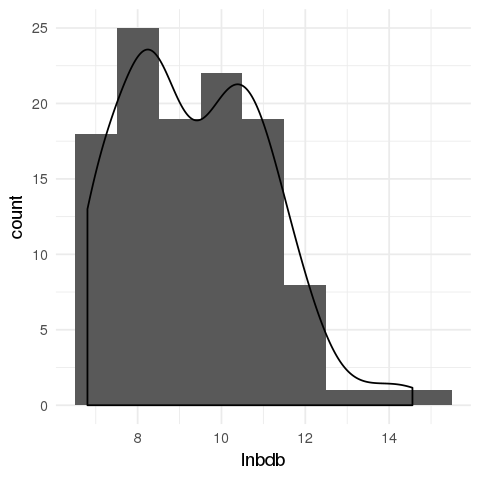

In [9]:
hist <- ggplot(data, aes(lnbdb))
hist + geom_histogram(binwidth=1) +
    geom_density(aes(y = ..count..)) +  
    # use aes(y=..density..)) + geom_density() +  if want density
    theme_minimal()
tiff("./figures/figure1.tif", width=4, height=4, units="in", res=300)
hist + geom_histogram(binwidth=1) +
    geom_density(aes(y = ..count..)) +  
    # use aes(y=..density..)) + geom_density() +  if want density
    theme_minimal()
dev.off()

# Linear Regression

This is Table 2 from original paper.

Model takes the form of $y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \epsilon$.

In matrix notation, $y = X\beta + \epsilon$, where y is a vector containing the outcome of interest (lnbdb), $ X $ is a matrix of predictors (model matrix), and $\epsilon$ is the error term.

In [10]:
m1 <- lm(lnbdb ~ lnduration + lnpop + lnmilqual + lngdp + cw + lnmountain + democ + ethnicpolar + relpolar, data=data)
m2 <- lm(lnbdb ~ lnduration + cw + democ + ethnicpolar, data=data)
stargazer(m1, m2, title="Table 2", type="text")


Table 2
                                 Dependent variable:             
                    ---------------------------------------------
                                        lnbdb                    
                             (1)                    (2)          
-----------------------------------------------------------------
lnduration                0.807***               0.857***        
                           (0.119)                (0.111)        
                                                                 
lnpop                      -0.044                                
                           (0.081)                               
                                                                 
lnmilqual                   0.101                                
                           (0.120)                               
                                                                 
lngdp                      -0.191                                
 